In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("./datasets/combined_df.csv")
df.head()

,Country,Gini coefficient 1990,Gini coefficient 1991,Gini coefficient 1992,Gini coefficient 1993,Gini coefficient 1994,Gini coefficient 1995,Gini coefficient 1996,Gini coefficient 1997,Gini coefficient 1998,...,2018 Mortality,2019 Mortality,2020 Mortality,2021 Mortality,2022 Mortality,Average Power Line,Average Schools,Average Supermarkets,Average Public Roads,Average Hospitals
0,Australia,0.325786,0.325786,0.325786,0.325786,0.325786,0.325786,0.325786,0.325786,0.325786,...,4.496637,4.534294,4.541600,4.505020,4.419226,8.0,16.0,10.8,69.8,1.8
1,Austria,0.308280,0.308280,0.308280,0.308280,0.308280,0.299143,0.293178,0.290654,0.313408,...,3.921898,3.933814,3.986880,4.072674,4.178208,3.4,15.6,10.2,45.0,1.0
2,Belarus,0.320184,0.320184,0.320184,0.320184,0.320184,0.320184,0.320184,0.320184,0.320184,...,5.749728,5.401263,5.140058,4.960482,4.841156,2.2,12.0,1.2,24.4,1.0
3,Brazil,0.604500,0.604500,0.531017,0.600656,0.600656,0.595304,0.598373,0.597537,0.595654,...,15.990706,15.526359,15.132572,14.805685,14.545867,1.8,3.8,2.8,18.4,0.6
4,Canada,0.313654,0.319434,0.315643,0.316759,0.313038,0.315096,0.327681,0.331169,0.332172,...,5.549870,5.583710,5.690650,5.914808,6.163911,2.4,20.8,11.0,11.4,0.4


In [4]:
recent_data = pd.DataFrame()
recent_data['Country'] = df['Country']

# Select the most recent non-null value for each feature
recent_data['Gini'] = df['Gini coefficient 2022']
recent_data['GDP_per_capita'] = df['GDP per Capita 2022']
recent_data['Expected_School_Years'] = df['Expected Years of Schooling (2021)']
recent_data['Mean_School_Years'] = df['Mean Years of Schooling (2021)']
recent_data['Literacy_Rate'] = df['Literacy rate 2022']
recent_data['Internet_Usage'] = df['Internet Usage (% of Population) 2022']
recent_data['CO2_per_capita'] = df['2023 CO2 per capita']  # Using the first CO2 column
recent_data['CO2_per_capita_2'] = df['2023 CO2 per capita #2']  # Using the second CO2 column
recent_data['Average Power Line']  = df['Average Power Line']
recent_data['Average Schools'] = df['Average Schools']
recent_data['Average Supermarkets'] = df['Average Supermarkets']
recent_data['Average Public Roads'] = df['Average Public Roads']
recent_data['Average Hospitals'] = df['Average Hospitals']
recent_data['Energy'] = df['2021 Energy']
recent_data['Mortality_2022'] = df['2022 Mortality']


In [5]:
recent_data = recent_data.dropna()
recent_data


,Country,Gini,GDP_per_capita,Expected_School_Years,Mean_School_Years,Literacy_Rate,Internet_Usage,CO2_per_capita,CO2_per_capita_2,Average Power Line,Average Schools,Average Supermarkets,Average Public Roads,Average Hospitals,Energy,Mortality_2022
0,Australia,0.343326,61009.807715,21.054590,12.726820,99.00000,94.8762,14.478,0.0,8.0,16.0,10.8,69.8,1.8,1.631391,4.419226
1,Austria,0.307016,47250.969590,16.007959,12.256690,98.00000,93.6141,6.416,0.0,3.4,15.6,10.2,45.0,1.0,0.053805,4.178208
2,Belarus,0.243834,6206.632213,15.169970,12.143580,100.00000,89.5073,6.197,0.0,2.2,12.0,1.2,24.4,1.0,0.672071,4.841156
3,Brazil,0.520152,9032.084816,15.599060,8.128814,94.69000,80.5278,2.304,0.0,1.8,3.8,2.8,18.4,0.6,2.263552,14.545867
4,Canada,0.317496,45227.144735,16.396259,13.834427,99.00000,94.0000,13.977,0.0,2.4,20.8,11.0,11.4,0.4,1.381380,6.163911
5,Chile,0.430427,14272.270992,16.731300,10.934966,97.16000,90.6769,3.931,0.0,3.4,95.8,14.8,32.0,1.4,0.010265,7.015981
6,Colombia,0.548193,6854.209236,14.442750,8.862860,96.00000,72.7964,2.011,0.0,7.2,25.4,27.6,15.8,3.6,3.543607,14.453973
7,Croatia,0.288960,16616.391536,15.112100,12.191084,99.45000,82.0716,4.498,0.0,1.4,0.6,0.6,8.0,0.0,0.313412,5.360567
8,Czechia,0.262021,20627.348650,16.219681,12.869310,99.00000,84.5401,7.921,0.0,9.8,5.4,1.6,9.0,0.4,0.047906,4.643248
9,Denmark,0.283235,60248.671230,18.714800,12.960490,99.00000,97.8601,4.584,0.0,1.8,18.4,14.0,69.2,2.8,0.228746,3.070977


In [6]:
X = recent_data.drop(columns=['Country', 'Mortality_2022'])
y = recent_data['Mortality_2022']

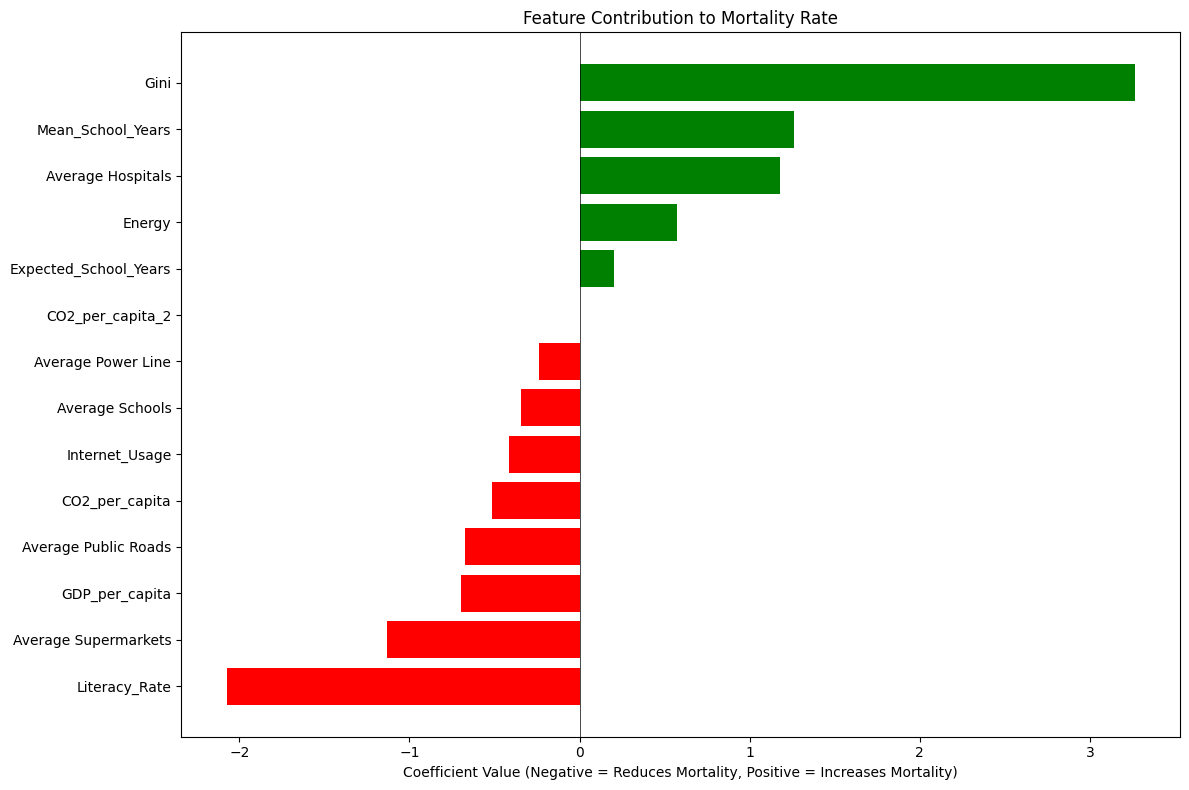


Feature Contributions to Mortality Rate:
Negative coefficients indicate features that reduce mortality
Positive coefficients indicate features that increase mortality

Ranked from strongest mortality-reducing to strongest mortality-increasing factors:
Literacy_Rate: -2.0748 (reduces mortality)
Average Supermarkets: -1.1315 (reduces mortality)
GDP_per_capita: -0.6962 (reduces mortality)
Average Public Roads: -0.6733 (reduces mortality)
CO2_per_capita: -0.5132 (reduces mortality)
Internet_Usage: -0.4121 (reduces mortality)
Average Schools: -0.3434 (reduces mortality)
Average Power Line: -0.2389 (reduces mortality)
CO2_per_capita_2: 0.0000 (increases mortality)
Expected_School_Years: 0.2049 (increases mortality)
Energy: 0.5711 (increases mortality)
Average Hospitals: 1.1781 (increases mortality)
Mean_School_Years: 1.2626 (increases mortality)
Gini: 3.2620 (increases mortality)

Model R² Score: 0.9460


In [7]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Fit linear regression model
model = LinearRegression()
model.fit(X_scaled, y)
# Create DataFrame with actual coefficients (not absolute values)
feature_contribution = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
feature_contribution = feature_contribution.sort_values('Coefficient', ascending=True)

# Create a horizontal bar plot
plt.figure(figsize=(12, 8))
colors = ['red' if x < 0 else 'green' for x in feature_contribution['Coefficient']]
plt.barh(feature_contribution['Feature'], feature_contribution['Coefficient'], color=colors)
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.title('Feature Contribution to Mortality Rate')
plt.xlabel('Coefficient Value (Negative = Reduces Mortality, Positive = Increases Mortality)')
plt.tight_layout()
plt.show()

# Print feature contributions with direction
print("\nFeature Contributions to Mortality Rate:")
print("Negative coefficients indicate features that reduce mortality")
print("Positive coefficients indicate features that increase mortality")
print("\nRanked from strongest mortality-reducing to strongest mortality-increasing factors:")
for idx, row in feature_contribution.iterrows():
    direction = "increases" if row['Coefficient'] > 0 else "reduces"
    print(f"{row['Feature']}: {row['Coefficient']:.4f} ({direction} mortality)")

# Print model performance
print(f"\nModel R² Score: {model.score(X_scaled, y):.4f}")

In [8]:
def objective(weights):
    cdi = np.dot(X_scaled, weights)
    correlation = np.corrcoef(cdi, y)[0, 1]
    return -abs(correlation)  # Negative because we want to maximize correlation

# Function to ensure weights sum to 1
def constraint(weights):
    return np.sum(weights) - 1

# Initial weights (equal weighting)
initial_weights = np.ones(len(X.columns)) / len(X.columns)

In [9]:
constraints = ({'type': 'eq', 'fun': constraint})
bounds = [(0, 1) for _ in range(len(X.columns))]

# Perform optimization
# Nelder-Mead = -0.8728
# Powell = -0.8609
# SLSQP = -0.8847
# CG = -0.9726
# BFGS = -0.9726
# L-BFGS-B = -0.8847
# TNC = -0.8845
# trust-constr = -0.8845

# Perform optimization
result = minimize(objective, initial_weights, method='BFGS', 
                 constraints=constraints, bounds=bounds)

# Get optimal weights
optimal_weights = result.x

# Calculate final CDI
cdi = np.dot(X_scaled, optimal_weights)

# Print the optimal weights
print("Optimal Weights:")
for feature, weight in zip(X.columns, optimal_weights):
    print(f"{feature}: {weight:.4f}")

# Print the final CDI
print(f"\nFinal CDI: {cdi[0]:.4f}")
cdi 
# Average correlation between cdi and mortality
correlation = np.corrcoef(cdi, y)[0, 1]
print(f"Average Correlation between CDI and Mortality: {correlation:.4f}")


Optimal Weights:
Gini: -1.2037
GDP_per_capita: 0.2568
Expected_School_Years: -0.0757
Mean_School_Years: -0.4659
Literacy_Rate: 0.7657
Internet_Usage: 0.1522
CO2_per_capita: 0.1893
CO2_per_capita_2: 0.0714
Average Power Line: 0.0882
Average Schools: 0.1267
Average Supermarkets: 0.4176
Average Public Roads: 0.2485
Average Hospitals: -0.4348
Energy: -0.2107

Final CDI: 0.9134
Average Correlation between CDI and Mortality: -0.9726


/var/folders/31/w2zt100d46vbd05gsww_hqj00000gn/T/ipykernel_1995/1027746943.py:15: RuntimeWarning: Method BFGS cannot handle constraints.
  result = minimize(objective, initial_weights, method='BFGS',
/var/folders/31/w2zt100d46vbd05gsww_hqj00000gn/T/ipykernel_1995/1027746943.py:15: RuntimeWarning: Method BFGS cannot handle bounds.
  result = minimize(objective, initial_weights, method='BFGS',


In [10]:
# get correlation between cdi and mortality
correlation = np.corrcoef(cdi, y)[0, 1]
print(f"Correlation between CDI and Mortality: {correlation:.4f}")

Correlation between CDI and Mortality: -0.9726


In [11]:
# get correlation between hdi and mortality
correlation = np.corrcoef(df['Human Development Index (2021)'], df['2022 Mortality'])[0, 1]
print(f"Correlation between HDI and Mortality: {correlation:.4f}")

Correlation between HDI and Mortality: -0.8131
